# Feature Selection Using Random Forest

#### Here we have real user data from Google Analytics, which shows on a session level if a user buys a product or not when visiting the website. The dataset includes encoded values only and column names are changed to anonymous. 
#### Our goal is to choose the most important features from the dataset with random forest model and predict if a user is converting or not


In [1]:
#Importing libraries
from google2pandas import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Loading dataset of the website visitors
df = pd.read_csv("dataset.csv") 

In [2]:
#Target variable shows if a visitor converted or not
df.head()

,Target variable,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 268,Feature 269,Feature 270,Feature 271,Feature 272,Feature 273,Feature 274,Feature 275,Feature 276,Feature 277
0,0,39,3,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,439,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,128,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,62,3,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
#278 columns and 965 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Columns: 278 entries, Target variable to Feature 277
dtypes: int64(278)
memory usage: 2.0 MB


In [4]:
df.describe()

,Target variable,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 268,Feature 269,Feature 270,Feature 271,Feature 272,Feature 273,Feature 274,Feature 275,Feature 276,Feature 277
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,...,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,0.098446,125.693264,2.409326,0.769948,0.688083,0.298446,0.013472,0.769948,0.230052,0.348187,...,0.001036,0.001036,0.009326,0.111917,0.076684,0.026943,0.021762,0.229016,0.251813,0.281865
std,0.298071,334.247593,3.196425,0.421084,0.463516,0.457813,0.115342,0.421084,0.421084,0.476643,...,0.032191,0.032191,0.096172,0.315428,0.266227,0.162001,0.145980,0.420417,0.434280,0.450141
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,75.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3338.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Checking if any columns have missing values
df.columns[df.isna().any()]

Index([], dtype='object')

In [6]:
#Feature 1 and Feature 2 are only columns without binary values
df.columns[df.max()!=1]

Index(['Feature 1', 'Feature 2'], dtype='object')

In [7]:
#Most of the columns are binary-encoded features.
len(df.columns[df.max()==1])

276

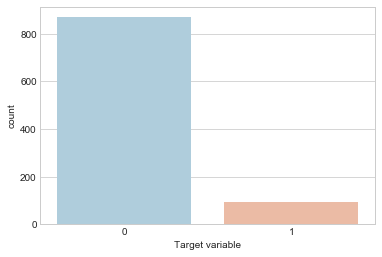

In [8]:
#Distribution of target variable
sns.set_style('whitegrid')
sns.countplot(x='Target variable',data=df,palette='RdBu_r')

Text(0.5,0,'Feature 1')

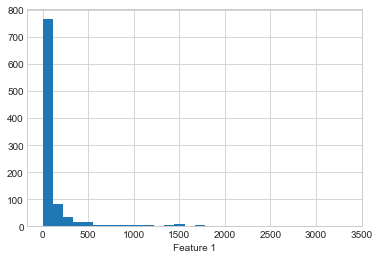

In [9]:
#Feature 1 distribution
sns.set_style('whitegrid')
df['Feature 1'].hist(bins=30)
plt.xlabel('Feature 1')

In [10]:
df['Feature 1'].max()

3338

Text(0.5,0,'Feature 2')

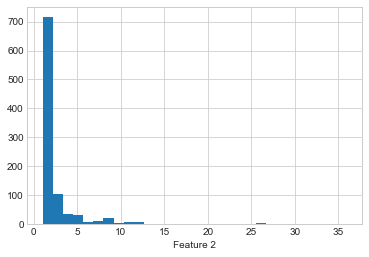

In [11]:
#Feature 2 distribution
sns.set_style('whitegrid')
df['Feature 2'].hist(bins=30)
plt.xlabel('Feature 2')

In [12]:
df['Feature 2'].max()

36

In [13]:
#Importing Random Forest and feature selection libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
X = df.drop('Target variable',axis=1)
y = df['Target variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
#calculating accuracy with all features
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8840125391849529

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94       280
          1       0.75      0.08      0.14        39

avg / total       0.87      0.88      0.84       319



In [16]:
#Using selectFromModelto choose the most important features
#Setting threshold as 0.02

sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000),threshold = 0.02)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=0.02)

In [17]:
#Printing the boolean values of the important columns
sel.get_support()

array([ True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [18]:
#Total number of features went down from 278 to 10 
selected_features = X_train.columns[(sel.get_support())]
len(selected_features)

10

In [19]:
selected_features

Index(['Feature 1', 'Feature 2', 'Feature 9', 'Feature 100', 'Feature 143',
       'Feature 216', 'Feature 229', 'Feature 253', 'Feature 276',
       'Feature 277'],
      dtype='object')

In [20]:
X = df[selected_features]
y = df['Target variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#fitting the model with the most importart features
clf2 = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.8934169278996865

In [21]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94       280
          1       0.73      0.21      0.32        39

avg / total       0.88      0.89      0.87       319



In [22]:
#Accuracy increased from 0.884 to 0.893